In [1]:
# https://www.kaggle.com/datasets/fabiochiusano/medium-articles

In [ ]:
#!pip3 install --upgrade gensim --user

In [2]:
#import numpy as np
from gensim.models import Word2Vec
import pandas as pd

In [3]:
df = pd.read_csv('medium_articles 2.csv')

In [4]:
df.shape

(192368, 6)

In [5]:
df.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


# Fine-Tuning Word2Vec

In [6]:
articles = df['text']

In [7]:
articles[0]

'Photo by Josh Riemer on Unsplash\n\nMerry Christmas and Happy Holidays, everyone!\n\nWe just wanted everyone to know how much we appreciate everyone and how thankful we are for all our readers and writers here. We wouldn’t be anywhere without you, so thank you all for bringing informative, vulnerable, and important pieces that destigmatize mental illness and mental health.\n\nWithout further ado, here are ten of our top stories from last week, all of which were curated:\n\n“Just as the capacity to love and inspire is universal so is the capacity to hate and discourage. Irrespective of gender, race, age or religion none of us are exempt from aggressive proclivities. Those who are narcissistically disordered, and accordingly repress deep seated feelings of inferiority with inflated delusions of grandeur and superiority, are more prone to aggression and violence. They infiltrate our interactions in myriad environments from home, work, school and the cyber world. Hence, bullying does not 

In [8]:
articles[0].replace('\n', '')

'Photo by Josh Riemer on UnsplashMerry Christmas and Happy Holidays, everyone!We just wanted everyone to know how much we appreciate everyone and how thankful we are for all our readers and writers here. We wouldn’t be anywhere without you, so thank you all for bringing informative, vulnerable, and important pieces that destigmatize mental illness and mental health.Without further ado, here are ten of our top stories from last week, all of which were curated:“Just as the capacity to love and inspire is universal so is the capacity to hate and discourage. Irrespective of gender, race, age or religion none of us are exempt from aggressive proclivities. Those who are narcissistically disordered, and accordingly repress deep seated feelings of inferiority with inflated delusions of grandeur and superiority, are more prone to aggression and violence. They infiltrate our interactions in myriad environments from home, work, school and the cyber world. Hence, bullying does not happen in isolat

In [53]:
a = articles[0].replace('\n', '').lower().split()
print(a)

['photo', 'by', 'josh', 'riemer', 'on', 'unsplashmerry', 'christmas', 'and', 'happy', 'holidays,', 'everyone!we', 'just', 'wanted', 'everyone', 'to', 'know', 'how', 'much', 'we', 'appreciate', 'everyone', 'and', 'how', 'thankful', 'we', 'are', 'for', 'all', 'our', 'readers', 'and', 'writers', 'here.', 'we', 'wouldn’t', 'be', 'anywhere', 'without', 'you,', 'so', 'thank', 'you', 'all', 'for', 'bringing', 'informative,', 'vulnerable,', 'and', 'important', 'pieces', 'that', 'destigmatize', 'mental', 'illness', 'and', 'mental', 'health.without', 'further', 'ado,', 'here', 'are', 'ten', 'of', 'our', 'top', 'stories', 'from', 'last', 'week,', 'all', 'of', 'which', 'were', 'curated:“just', 'as', 'the', 'capacity', 'to', 'love', 'and', 'inspire', 'is', 'universal', 'so', 'is', 'the', 'capacity', 'to', 'hate', 'and', 'discourage.', 'irrespective', 'of', 'gender,', 'race,', 'age', 'or', 'religion', 'none', 'of', 'us', 'are', 'exempt', 'from', 'aggressive', 'proclivities.', 'those', 'who', 'are', 

In [ ]:
# Format should be --> [[]]
# [['I', 'like', 'eating' ...], ['My', 'name' , 'is' ...]]

In [9]:
len(articles)

192368

In [9]:
corpus = []

for article in articles:
    temp_list = article.replace('\n', '').lower().split()
    #if len(temp_list) == 1 and temp_list.isalnum(): # To avoid single chars punctuations etc
    corpus.append(temp_list)
    #elif len(temp_list) > 1:
    #corpus.append(temp_list)
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
len(corpus)

192368

In [13]:
print(corpus[0])

['photo', 'by', 'josh', 'riemer', 'on', 'unsplashmerry', 'christmas', 'and', 'happy', 'holidays,', 'everyone!we', 'just', 'wanted', 'everyone', 'to', 'know', 'how', 'much', 'we', 'appreciate', 'everyone', 'and', 'how', 'thankful', 'we', 'are', 'for', 'all', 'our', 'readers', 'and', 'writers', 'here.', 'we', 'wouldn’t', 'be', 'anywhere', 'without', 'you,', 'so', 'thank', 'you', 'all', 'for', 'bringing', 'informative,', 'vulnerable,', 'and', 'important', 'pieces', 'that', 'destigmatize', 'mental', 'illness', 'and', 'mental', 'health.without', 'further', 'ado,', 'here', 'are', 'ten', 'of', 'our', 'top', 'stories', 'from', 'last', 'week,', 'all', 'of', 'which', 'were', 'curated:“just', 'as', 'the', 'capacity', 'to', 'love', 'and', 'inspire', 'is', 'universal', 'so', 'is', 'the', 'capacity', 'to', 'hate', 'and', 'discourage.', 'irrespective', 'of', 'gender,', 'race,', 'age', 'or', 'religion', 'none', 'of', 'us', 'are', 'exempt', 'from', 'aggressive', 'proclivities.', 'those', 'who', 'are', 

In [54]:
model = Word2Vec(corpus, size=100, window=5, min_count=4, sg=1) # size or window_size depends on the version 
# For a relatively small dataset such as this one go with skip gram (sg=1), otherwise go with CBOW sg=0)

In [70]:
model.wv['machine']

array([ 0.07080358, -0.02679827, -0.30934355, -0.3443136 , -0.0685961 ,
       -0.04583018,  0.2088369 ,  0.18365619,  0.05306746,  0.20156258,
       -0.3022518 , -0.01879605, -0.30781358,  0.0037492 , -0.41801032,
        0.21985519,  0.02949535,  0.19196412,  0.19260687, -0.16686071,
       -0.42811936,  0.5866743 , -0.03536852, -0.6351901 , -0.2761436 ,
        0.43453476, -0.08578978,  0.58097523, -0.01725243, -0.30724835,
       -0.2793984 , -0.01319283,  0.8347698 , -0.04043087, -0.45897636,
       -0.13051917, -0.25890222, -0.25206912, -0.39699045,  0.13116735,
       -0.08141925,  0.05161498, -0.6206748 , -0.06000923, -0.45312473,
        0.08309034,  0.11844143,  0.14745957, -0.49915102, -0.3765022 ,
       -0.01842873,  0.3709118 , -0.16397373, -0.19353722, -0.7872113 ,
        0.1918337 ,  0.37800738, -0.17746396, -0.03110194,  0.05003   ,
       -0.0339273 ,  0.48684794, -0.0381876 ,  0.06813304,  0.12561512,
       -0.03874297, -0.28984252,  0.20539838, -0.4258446 , -0.38

In [71]:
model.wv['machine'].__len__()

100

In [72]:
model.wv.most_similar('machine')

[('(ml)', 0.8640047311782837),
 ('learning.machine', 0.8523685932159424),
 ('learningmachine', 0.8509168028831482),
 ('learning/deep', 0.8329479694366455),
 ('learning?machine', 0.8317896723747253),
 ('learning.data', 0.8238363265991211),
 ('(dl),', 0.8224249482154846),
 ('learning.deep', 0.8170819878578186),
 ('ml', 0.8161157965660095),
 ('learning(ml)', 0.8131031394004822)]

In [73]:
model.wv.most_similar('artificial')

[('(ai)', 0.8716957569122314),
 ('(ai),', 0.841921329498291),
 ('(ai).', 0.8331751227378845),
 ('ai', 0.8207311630249023),
 ('ai,', 0.8147956132888794),
 ('intelligenceartificial', 0.80281662940979),
 ('intelligence', 0.8001212477684021),
 ('intelligence-based', 0.7979702353477478),
 ('intelligence?artificial', 0.7877730131149292),
 ('nanotechnology,', 0.7834638357162476)]

In [74]:
model.wv.most_similar('orange')

[('orange,', 0.879578709602356),
 ('purple', 0.8383623361587524),
 ('yellow', 0.8345314860343933),
 ('blue', 0.8190454244613647),
 ('red,', 0.8189452886581421),
 ('yellow-green', 0.8007113337516785),
 ('red', 0.7972760200500488),
 ('yellow,', 0.7951509356498718),
 ('green', 0.776157796382904),
 ('purple,', 0.7743302583694458)]

In [75]:
model.wv.most_similar('bible')

[('scripture', 0.9087704420089722),
 ('bible,', 0.8734628558158875),
 ('torah', 0.8436594605445862),
 ('qur’an', 0.8408246636390686),
 ('scriptures', 0.8405900001525879),
 ('scripture,', 0.8279073238372803),
 ('bible.', 0.8174582719802856),
 ('quran', 0.8168655633926392),
 ('talmud', 0.8101521134376526),
 ('biblical', 0.8019708395004272)]

In [76]:
model.wv.most_similar('blue')

[('yellow', 0.8768370747566223),
 ('purple', 0.8712807297706604),
 ('red', 0.8643508553504944),
 ('red,', 0.8351566195487976),
 ('gray', 0.8263164758682251),
 ('blue,', 0.8262708187103271),
 ('orange', 0.81904536485672),
 ('pink', 0.8049202561378479),
 ('green', 0.7985594868659973),
 ('yellow,', 0.797485888004303)]

In [80]:
model.wv.most_similar('honda')

[('buick', 0.7536640167236328),
 ('vw', 0.7483949065208435),
 ('chevy', 0.7468302249908447),
 ('cadillac', 0.742072343826294),
 ('mercedes', 0.7418479919433594),
 ('mercedes.', 0.7406985759735107),
 ('chevrolet', 0.740503191947937),
 ('mercedes,', 0.7397758960723877),
 ('chrysler', 0.7395769953727722),
 ('renault', 0.736587643623352)]

In [77]:
model.wv.most_similar(positive=['ankara', 'france'], negative=['paris'], topn=5)

[('azerbaijan', 0.8013001680374146),
 ('russia', 0.7654227018356323),
 ('lebanon', 0.748695969581604),
 ('iran', 0.7454158067703247),
 ('serbia', 0.7434185743331909)]

In [106]:
model.wv.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=5)

[('iran', 0.7797328233718872),
 ('russia', 0.7524071335792542),
 ('arabia', 0.7327401638031006),
 ('azerbaijan', 0.7270328402519226),
 ('turkey', 0.718704342842102)]

In [78]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7605162858963013),
 ('king,', 0.6988126635551453),
 ('noelborn', 0.6737769842147827),
 ('singer', 0.6732379794120789),
 ('miranda’s', 0.6673427820205688)]

In [112]:
model.wv.similarity('dirty', 'dirty')

1.0

In [108]:
model.wv.similarity('dirty', 'smelly')

0.72783494

In [111]:
model.wv.similarity('dirty', 'clean')

0.6531769

#### Saving the model

In [63]:
model.save("word2vec_from_medium_articles.model")

#### Loading the model

In [64]:
from gensim.models import KeyedVectors
model = KeyedVectors.load("word2vec_from_medium_articles.model")

In [79]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7605162858963013),
 ('king,', 0.6988126635551453),
 ('noelborn', 0.6737769842147827),
 ('singer', 0.6732379794120789),
 ('miranda’s', 0.6673427820205688)]

# Pre-Trained Word2Vec

In [54]:
# Load Google's pre-trained Word2Vec model.
# Model -- https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download

# It’s 1.5GB! It includes word vectors for a vocabulary of 3 million words and phrases that they trained on roughly 100 billion words from a Google News dataset. 
# The vector length is 300 features.
# if you’re running 32-bit Python you’re going to get a memory error!

import gensim
model2 = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [67]:
# Does it include stop words?
# --> Some stop words like “a”, “and”, “of” are excluded, but others like “the”, “also”, “should” are included.
    
# Does it include misspellings of words?
# --> Yes. For instance, it includes both “mispelled” and “misspelled”–the latter is the correct one.
    
# Does it include commonly paired words?
# --> Yes. For instance, it includes “Soviet_Union” and “New_York”.
    
# Does it include numbers?
# --> Not directly; e.g., you won’t find “100”. But it does include entries like “###MHz_DDR2_SDRAM” where I’m assuming the ‘#’ are intended to match any digit.

# .wv --> DEPRECATED

In [119]:
model2.similarity('dirty', 'dirty')

0.99999994

In [110]:
model2.similarity('dirty', 'smelly')

0.57099473

In [120]:
model2.similarity('dirty', 'clean')

0.5180182

In [81]:
model2.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133)]

In [96]:
model2.most_similar('turkey') # case sensitive --> animal

[('turkeys', 0.760503888130188),
 ('Thanksgiving_turkey', 0.6594275832176208),
 ('turkey_breast', 0.658910870552063),
 ('roasted_turkey', 0.6292714476585388),
 ('chicken', 0.6282519102096558),
 ('venison', 0.6267568469047546),
 ('leftover_turkey', 0.6260672807693481),
 ('goose', 0.6195880174636841),
 ('ham', 0.5986766219139099),
 ('Cornish_hens', 0.598552405834198)]

In [98]:
model2.most_similar('Turkey') # Country

[('Turkish', 0.7505491375923157),
 ('Ankara', 0.7143250703811646),
 ('Armenia', 0.662308931350708),
 ('Erdogan', 0.6376515626907349),
 ('Bağış', 0.633830726146698),
 ('Turks', 0.6315782070159912),
 ('Gül', 0.6286807060241699),
 ('Azerbaijan', 0.6274693012237549),
 ('Erdoğan', 0.6264535784721375),
 ('Istanbul', 0.6218228340148926)]

In [105]:
model2.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=5)

[('buba', 0.5090778470039368),
 ('aso_oke', 0.46755221486091614),
 ('agbada', 0.4654040038585663),
 ('sokoto', 0.4528381824493408),
 ('Aso_Oke', 0.44628167152404785)]

In [55]:
model2.most_similar(positive=['Ankara', 'Germany'], negative=['Berlin'], topn=5)

[('Turkey', 0.7382822632789612),
 ('Turkish', 0.6419803500175476),
 ('Erdoğan', 0.5845338702201843),
 ('Gül', 0.574141800403595),
 ('Erdogan', 0.571012556552887)]

# Glove

In [82]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [83]:
glove_model = 'glove.6B.100d.txt'
word2vec = 'glove.6B.100d.glove'
glove2word2vec(glove_model, word2vec)

(400000, 100)

In [84]:
model3 = KeyedVectors.load_word2vec_format(word2vec)

In [85]:
model3['machine']

array([-0.65365  ,  0.49419  , -0.26245  , -0.20722  , -0.11413  ,
        0.35701  ,  1.0454   ,  0.21881  ,  0.52769  ,  0.60606  ,
        0.42521  , -0.65169  ,  0.15318  , -0.14797  ,  0.12651  ,
       -0.017124 ,  0.45325  ,  0.37166  , -0.26847  , -0.2627   ,
        0.43869  , -0.016615 ,  0.12714  , -0.54708  ,  0.089084 ,
        0.24336  , -0.34415  ,  0.0026505, -0.094268 ,  0.056114 ,
        0.46366  ,  0.68786  , -0.20631  , -0.088003 ,  0.32153  ,
       -0.91399  , -0.080976 , -0.90761  ,  0.92889  , -0.68033  ,
        0.23801  , -0.37469  , -0.43278  , -0.19243  , -0.23711  ,
       -0.73041  , -0.50592  , -0.30237  ,  0.0017281, -0.60923  ,
       -0.21046  ,  0.47403  ,  0.37333  ,  1.2475   ,  0.6299   ,
       -1.5292   , -0.32403  ,  0.59681  ,  0.97994  ,  0.59756  ,
        0.67625  ,  0.28223  , -0.26748  ,  1.425    , -0.34419  ,
        0.25212  ,  0.3024   , -0.26582  , -0.22583  ,  0.53783  ,
       -0.44439  , -0.24281  ,  0.38001  ,  0.085317 ,  0.4969

In [87]:
model3['machine'].__len__()

100

In [117]:
model3.similarity('dirty', 'dirty')

1.0

In [121]:
model3.similarity('dirty', 'clean')

0.57855904

In [86]:
model3.most_similar('ankara')

[('turkey', 0.7512096762657166),
 ('istanbul', 0.6787630915641785),
 ('turkish', 0.6690374612808228),
 ('damascus', 0.6372509002685547),
 ('tbilisi', 0.6322182416915894),
 ('erdogan', 0.6258037686347961),
 ('moscow', 0.6217041015625),
 ('brussels', 0.6181437969207764),
 ('skopje', 0.6164302825927734),
 ('cyprus', 0.606403112411499)]

In [93]:
model3.most_similar('machine')

[('machines', 0.7854336500167847),
 ('device', 0.6772987842559814),
 ('equipment', 0.6411972641944885),
 ('gun', 0.6409083604812622),
 ('guns', 0.6361788511276245),
 ('using', 0.6302391886711121),
 ('hand', 0.613443911075592),
 ('tool', 0.6132402420043945),
 ('weapon', 0.6078564524650574),
 ('used', 0.6072092056274414)]

In [95]:
model3.most_similar('turkey')

[('ankara', 0.7512097358703613),
 ('turkish', 0.7208108901977539),
 ('greece', 0.714114248752594),
 ('syria', 0.6968653202056885),
 ('bulgaria', 0.6896626949310303),
 ('russia', 0.6875777244567871),
 ('cyprus', 0.6828424334526062),
 ('ukraine', 0.6638251543045044),
 ('iran', 0.6626933813095093),
 ('romania', 0.6525595188140869)]

In [99]:
model3.most_similar('student')

[('students', 0.8432977199554443),
 ('teacher', 0.8083398938179016),
 ('school', 0.7811790108680725),
 ('graduate', 0.7617563605308533),
 ('faculty', 0.7405667304992676),
 ('academic', 0.7332330942153931),
 ('college', 0.7243876457214355),
 ('teachers', 0.7197794318199158),
 ('university', 0.7133212685585022),
 ('youth', 0.7073768377304077)]

In [100]:
model3.most_similar(positive=['woman', 'father'], negative=['man'], topn=1)

[('mother', 0.9024620056152344)]

In [101]:
model3.most_similar(positive=['woman', 'uncle'], negative=['man'], topn=1)

[('aunt', 0.8368030786514282)]

In [102]:
model3.most_similar(positive=['ankara', 'germany'], negative=['berlin'], topn=1)

[('turkey', 0.8147119283676147)]

In [107]:
model3.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.7698541283607483)]

#### Visualization

In [1]:
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
embeddings_dict = {}
with open("glove.6B.100d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [3]:
tsne = TSNE(n_components=2, random_state=0)

In [4]:
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]

In [5]:
Y = tsne.fit_transform(vectors[:1000])

In [7]:
import seaborn as sns
import pandas as pd

In [8]:
df = pd.DataFrame({'Axis1':Y[:, 0], 'Axis2':Y[:, 1]})

In [45]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (33, 25)

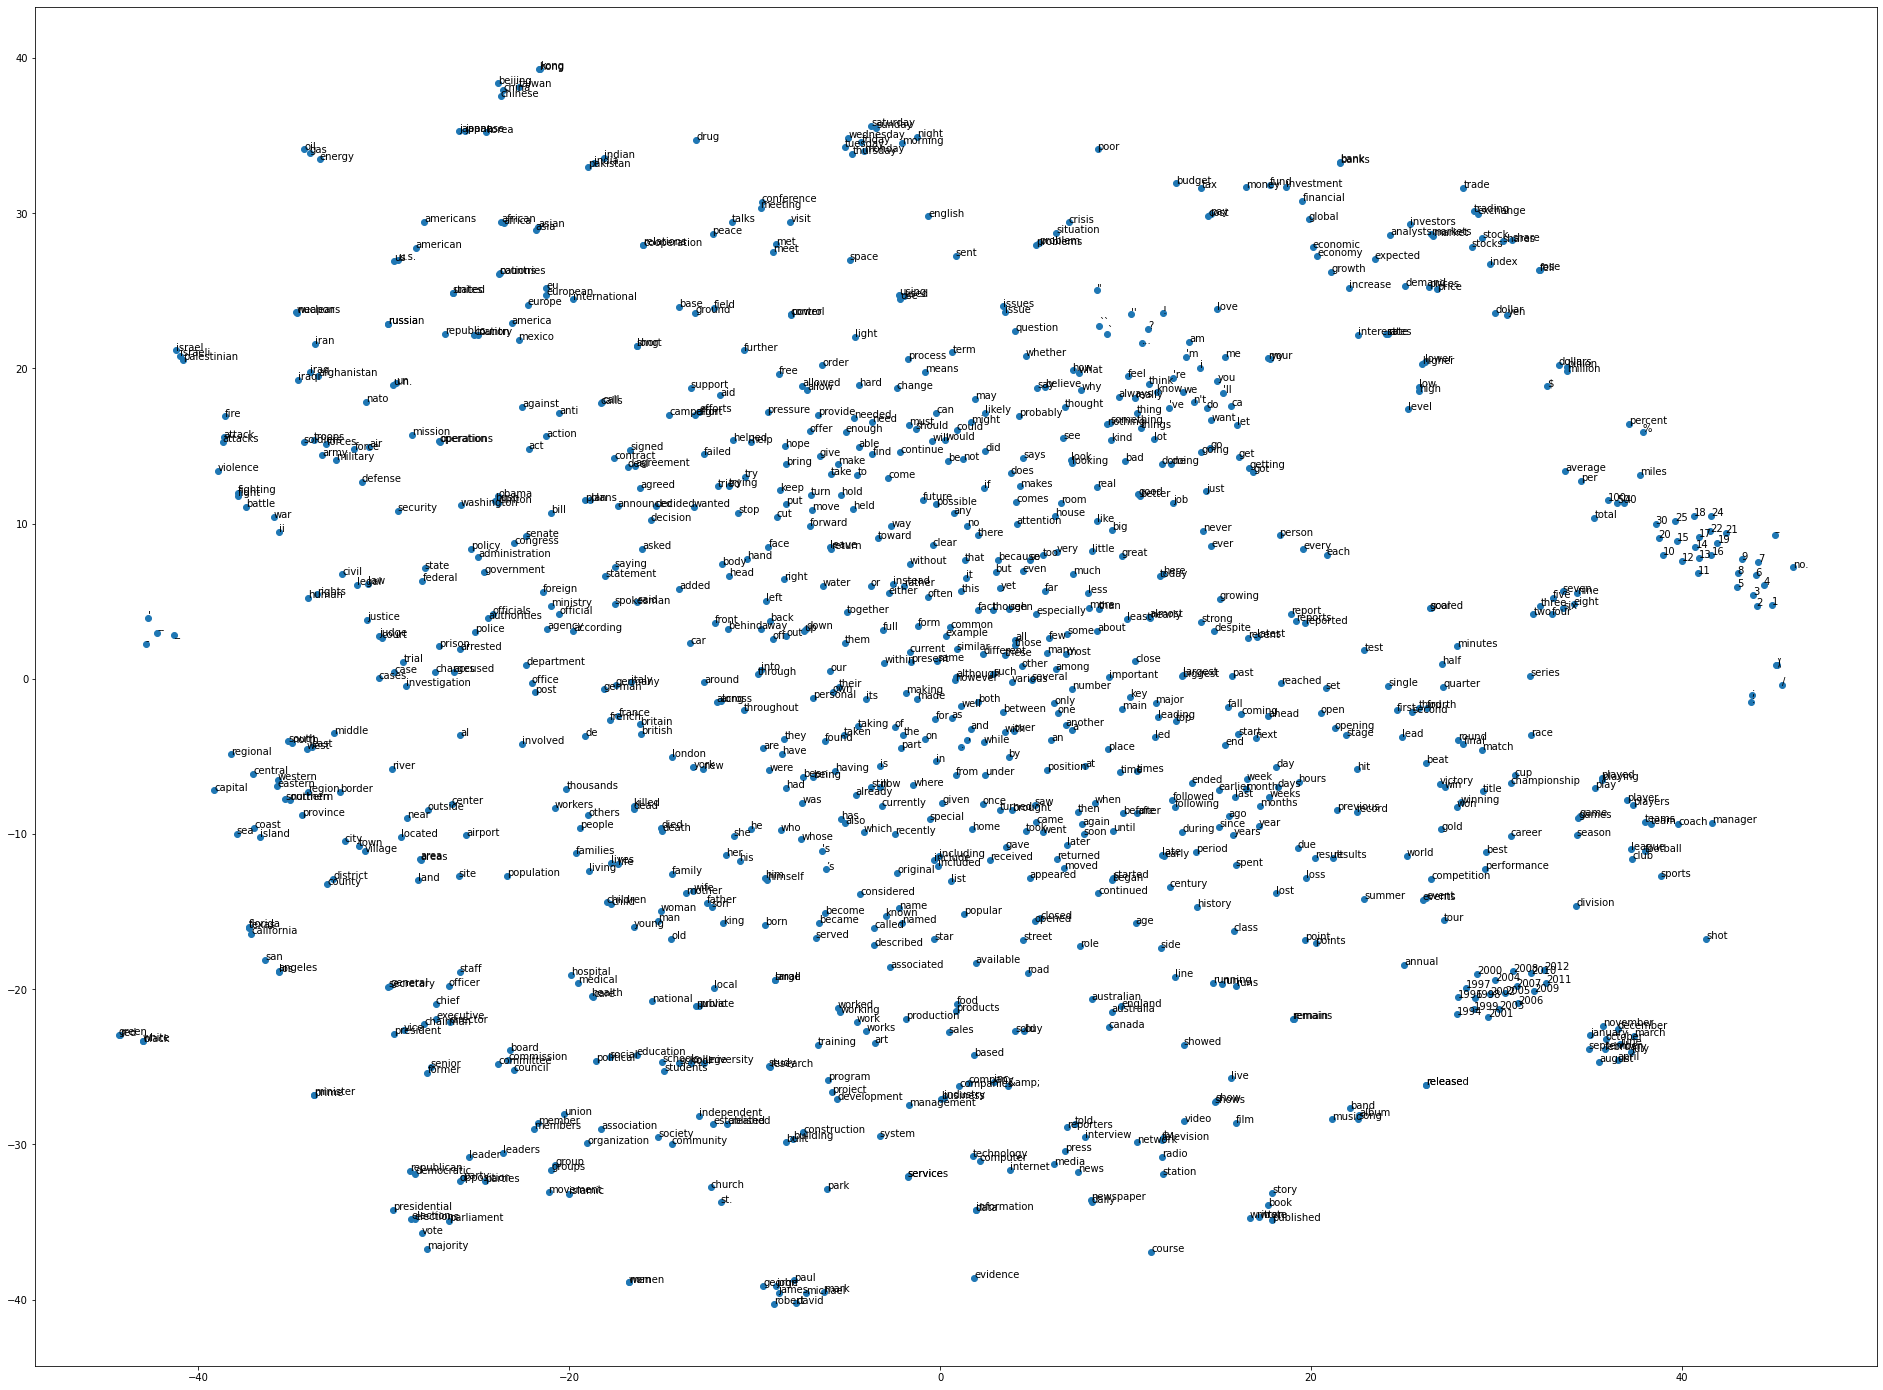

In [46]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])


for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()